# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

### Loading of data can be done in two ways :
    1.1) Download the data using link in the python code
    1.2) Unzip the file
    1.3) Use pickled data
    
    2.1) Download the data using link in your system
    2.2) Unzip the file
    2.3) Use pickled data path directly to load and get images and lables
    
Using approach 1 here

In [5]:
import hashlib
import os
import pickle
from urllib.request import urlretrieve
import numpy as np
from PIL import Image
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
# from tqdm import tqdm
from zipfile import ZipFile

# Load pickled data
import pickle

def download(url, file):
    """
    Download file from <url>
    :param url: URL to file
    :param file: Local file path
    """
    if not os.path.isfile(file):
        print('File not found : ' + file + '...')
        
    else :
        print("Ok")
# Downloading the training and test dataset.
download('http://no-link', 'Soda_Bottles.zip')

#Unzip the downloaded file to get pickled data
# zip = ZipFile('Soda_Bottles.zip')
# zip.extractall()


# Saving data to variables
# training_file = os.path.abspath("train.p")
# validation_file= os.path.abspath("valid.p")
# testing_file = os.path.abspath("test.p")

# with open(training_file, mode='rb') as f:
#     train = pickle.load(f)
# with open(validation_file, mode='rb') as f:
#     valid = pickle.load(f)
# with open(testing_file, mode='rb') as f:
#     test = pickle.load(f)
    
# X_train, y_train = train['features'], train['labels']
# X_valid, y_valid = valid['features'], valid['labels']
# X_test, y_test = test['features'], test['labels']

Ok


In [23]:
count = 0
dir_name=[]
for x in os.walk('Soda Bottles') :
    count +=1
    if count > 1 :
        dir_name.append(x[0].split('/')[1])


print(dir_name)
print(len(dir_name))

['MD.Diet', 'MD.Orig', 'P.Cherry', 'P.diet', 'P.Orig', 'P.Zero', 'P.Rsugar', 'M.Beer']
8


Load All Data

Approach 2 code :

training_file = os.path.abspath("D:/Projects/Traffic sign/train.p")
validation_file= os.path.abspath("D:/Projects/Traffic sign/valid.p")
testing_file = os.path.abspath("D:/Projects/Traffic sign/test.p")

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print(X_train[0])

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [62]:
#Number of training examples
n_train = len(X_train)

#Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[1])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Plotting a sample traffic sign image

Plotting the bar graph representing count of each sign

### Also shuffling data is a good practice to have random images.

Training dataset shape (34799, 32, 32, 3)


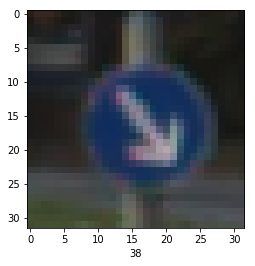

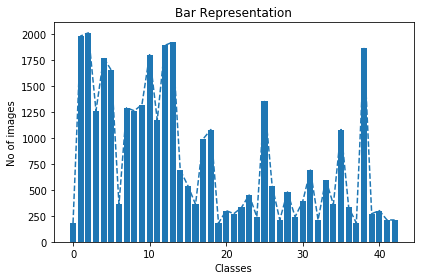

Images classes name : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Respective count of classes : [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
  690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
  480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
  210]


In [63]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn.utils import shuffle


#shuffling the data
X_train, y_train = shuffle(X_train, y_train)

#Print a sample image
for images1 in X_train :
    #print (images)
    plt.imshow(images1)
    break

for label in y_train :
    plt.xlabel(label)
    break
    
print("Training dataset shape", X_train.shape)

n_class,count = np.unique(y_train, return_counts=True)


height=[]
x_label=[]
for index in range(0,n_classes):
    height.append(count[index])
    x_label.append(index)

fig, ax = plt.subplots()
ax.plot(x_label, height, '--')
ax.set_xlabel('Classes')
ax.set_ylabel('No of images')
ax.set_title(r'Bar Representation')
fig.tight_layout()
plt.bar(n_class, count)
plt.show()

print ("Images classes name :",n_class)
print ("Respective count of classes :",count)

----

## Step 2: Design and Test a Model Architecture



### Pre-process the Data Set (normalization, grayscale, etc.)

Converting image to 1 channel.

There are number of ways to convert the image to 1 channel. I am using the weighted average of sum of the 3 channels as mentioned in cv2 code to convert to grayscale.

We can also directly convert to grayscle using cv2.

Why am I using weighted average??
Answer: The carnd-term1 environment did not have cv2 installed. I looked up the internet to convert image to single channel. This was suiting the most, so going with average weights.

Further I needed cv2 in the project but I was already done with the averaging and it was working fine, so ,I am using weighted average.

In [64]:
import tensorflow as tf

X_train = np.average(X_train,axis=3,weights=[0.299,0.587,0.114])
X_train= X_train.reshape((n_train,32,32,1))

X_valid = np.average(X_valid,axis=3,weights=[0.299,0.587,0.114])
X_valid= X_valid.reshape((np.shape(X_valid)[0],32,32,1))

X_test = np.average(X_test,axis=3,weights=[0.299,0.587,0.114])
X_test= X_test.reshape((np.shape(X_test)[0],32,32,1))

Image after gray scale conversion


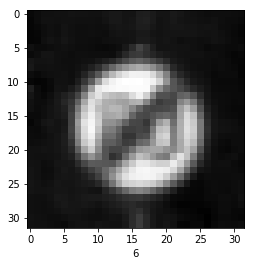

In [113]:
#Print a sample image
for images1 in X_train :
    #print (images)
    plt.imshow(images1.squeeze(),cmap='gray')
    break

for label in y_train :
    plt.xlabel(label)
    break
print("Image after gray scale conversion")

Convert to grayscale using cv2

for images in range (0,n_train):

    X_train[images] = cv2.cvtColor(X_train[images], cv2.COLOR_BGR2GRAY)

### There are various possible ways to normalize the image. 

    Option 1 being : (pixel - 128)/ 128 #Use this ---> X_train = (X_train-128)/128
    Option 2 being : Use min-max scaling
    
I am normalizing the data because it is easier to train the CNN with normalized data. Also 

In [67]:
#Min-Max scaling for grayscale image data      
a= 0.1
b =0.9
min_data=0
max_data=255
normalized_data = (a + ((X_train-min_data)*(b-a)/(max_data-min_data)))
print('Data Normalized')

Data Normalized


### Model Architecture

I have used the same model as the LeNet Architecture. I tried adding an extra fully connected layer but then I was expereincing difficuly achieving the accuracy required.

After return to previous model (LeNet) and twiking some hyperparameters I was able to get the desired results.

My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 RGB image   							| 
| Convolution1 5x5x1x6  | 1x1 stride, valid padding, outputs 28x28x6 	|
| RELU					| Activation									|
| Max pooling	      	| 2x2 stride,  outputs 16x16x6 				    |
| Convolution2 5x5x6x16	| 1x1 stride, valid padding, outputs 14x14x6    |
| Fully connected1  	| input =400 , output = 150						|
| RELU   				| Activation.        							|
| Dropout				| 0.8 for training , 1 for valid and test		|										
| Fully connected2  	| input =150 , output = 70						|
| RELU   				| Activation.        							|
| Dropout				| 0.8 for training , 1 for valid and test		|
| Fully connected3  	| input =150 , output = 70						|
| RELU   				| Activation.        							|


In [68]:
### Architecture !!!!
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def Traffic_Sign_Classifier(x,keep_probability):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 150.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 150), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(150))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1,keep_prob=keep_probability)

    # SOLUTION: Layer 4: Fully Connected. Input = 150. Output = 70.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(150, 70), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(70))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2,keep_prob=keep_probability)
    
    
    # SOLUTION: Layer 5: Fully Connected. Input = 70. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(70, n_classes), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc4_W) + fc4_b
    
    return logits

### Train, Validate and Test the Model

Traing the model:
    
    Learning rate = 0.001
    
    EPOCHS = 50
    
    Batch size = 100

I have used AdamOptimizer as it is seen that it it changes learning rate efficiently as compared to others and help us train neural network faster and quicker.


A validation set is used to check accuracy of model on images that are not part of training data set.

In [69]:
#Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1)) #for input image
y = tf.placeholder(tf.int32, (None))  #array of output lables
keep_probability = tf.placeholder(tf.float32,(None))

one_hot_y = tf.one_hot(y, n_classes)

#training pipeline
rate = 0.001
EPOCHS = 1
BATCH_SIZE = 100

logits = Traffic_Sign_Classifier(x,keep_probability)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#end of training pipeline


#Evaluation of Model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_probability:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
#End of evaluation function

## Training the data
Training data is divided into batches so that our total memory utilized and operationss performed are less.

In [70]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_probability :0.8})

                
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './savingTheModel')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.683

Model saved


## Accuracy on test data set
Once all the training is done and we have validated that our model is performing good, then we use this data set to verify the accuracy. This data set should be used at the end. If used with the valid or training data set, then model will learn from these images as well and we would not be able to judge how well our model will perform in new outputs.

In [71]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\savingTheModel
Test Accuracy = 0.678


---

## Step 3: Test a Model on New Images

I am using 5 test images taken from internet to test my trained model. I thought my model would be able to correctly predict the images as images were clear.

## Function to load the new test images

In [72]:
import os.path
import cv2
import matplotlib.pyplot as plt

def get_custom_image_array(path='test_images'):
    #total_images = len([name for name in os.listdir('path') if os.path.isfile(os.path.join('path',name))])
    x_test_arr=[]
    y_test_arr=[]
    for file in os.listdir(path) :    
        im2 = cv2.imread(path+'/'+file)
        im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
        im2 =cv2.resize(im2,(32,32))
        im2 = im2.reshape(32,32,1)
        x_test_arr.append(im2)
        y_test_arr.append(file.split('.')[0])

    return x_test_arr,y_test_arr

### Load and Output the Images

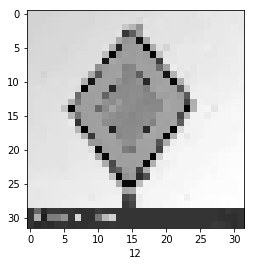

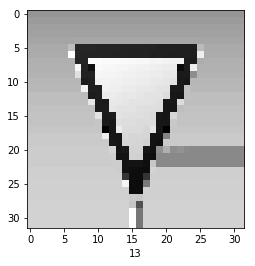

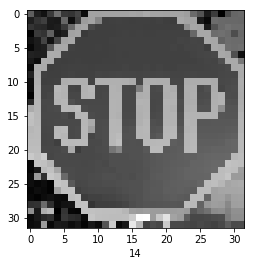

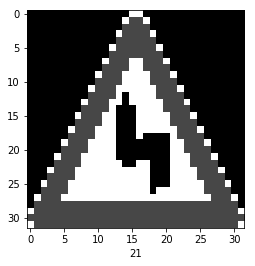

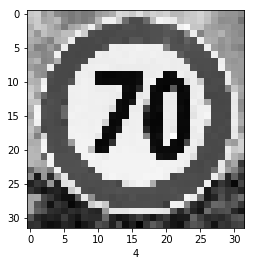

In [73]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
x_custom,y_custom=get_custom_image_array()

for index in range(0,len(x_custom)):
    #plt.imshow(images[0].squeeze())
    plt.imshow(x_custom[index].squeeze(),cmap='gray')
    plt.xlabel(y_custom[index])
    plt.figure()

### Predict the Sign Type for Each Image

In [74]:
x_custom,y_custom=get_custom_image_array()

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    softmax_prob = sess.run(logits, feed_dict = {x:x_custom,y:y_custom,keep_probability:1})
    #print (softmax_prob)
    print ("Prediction of the signs is : ",np.argmax(softmax_prob,1))
    #print (np.amax(softmax_prob,1))
    #print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\savingTheModel
Prediction of the signs is :  [13 12 14  2 18]


### Analyze Performance

My model is able to correctly identify 4 out of 5 images. However it, sometimes struggles to identify one of the images. The image it struggles with is the stop sign. My model confuses stop image with no entry. I think because there is less space between the alphabets of stop it struggles to identify it sometimes and treat "STOP" word as a "-" (dash). However I am sure that since the number of images for training set for stop sign is less, it is trained less to identify stop data set.

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Stop Sign      		| Stop sign   									| 
| Double curve 			| Double curve   								|
| Yield					| Yield											|
| 70 km/h	      		| 70 km/r    					 				|
| Priority Road			| Priority Road      							|

In [75]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
x_custom,y_custom=get_custom_image_array()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(x_custom, y_custom)
    print("Accuracy on new images = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\savingTheModel
Accuracy on new images = 0.200


My model gives overall accuracy of 80% with respect to new images. This compares favorably to the accuracy on the test data set which has accuracy of 93 percent. Since I have tested only 5 images it is close to 80. I think if images were more, the accuracy of the model would increase to around ~93% as well. 

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [109]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    softmax_prob = sess.run(logits, feed_dict = {x:x_custom,y:y_custom,keep_probability:1})
    softmax_prob = tf.nn.softmax(softmax_prob)
    softmax_prob = sess.run(softmax_prob)
    #print (softmax_prob)
    top_5=sess.run(tf.nn.top_k(tf.constant(softmax_prob), k=5))
    print("Softmax probabilities :\n",np.round(top_5[0],3))
    print("Prediction class :\n", top_5[1])
    
    #print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\savingTheModel
Softmax probabilities :
 [[0.936 0.047 0.01  0.004 0.001]
 [0.587 0.2   0.101 0.031 0.029]
 [0.922 0.066 0.008 0.001 0.001]
 [0.499 0.186 0.106 0.055 0.04 ]
 [0.868 0.131 0.001 0.    0.   ]]
Prediction class :
 [[13 42 12  6 32]
 [12 13  8  2  7]
 [14 18 17 40  4]
 [ 2 31 24 19 23]
 [18 26 22 27  0]]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [77]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")